# Managing missing data

## Setup
### Imports

In [1]:
import pandas as pd                                     # for dataset manipulation (DataFrames)
import numpy as np                                      # allows some mathematical operations
import matplotlib.pyplot as plt                         # library used to display graphs
import seaborn as sns                                   # more convenient visualisation library for dataframes
from sklearn.model_selection import train_test_split    # for classification
from sklearn.neighbors import KNeighborsClassifier      # for classification

### Loading the dataset

In [2]:
df = pd.read_csv("diabetes_data.csv")
data_columns = list(df.columns)

## Data preparation
### Preliminary analysis

Using what we learned last time, familiarize yourself with the diabetes dataset.
What observations can you make ? What problem do you think we are trying to solve with this data ?

**Answer**

This dataset is labeled. It contains 768 observations and 8 features. There are some abnormal values : for example BMI, skin thickness or blood pressure equal to zero. The dataset is not balanced (2 to 1 ratio). The goal with this set is probably to predict if a woman suffers of diabetes, knowing the 8 features of the dataset.

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df["Outcome"].value_counts()

0 500
1 268
Name: Outcome, dtype: int64

### Objectives and baseline method
For the rest of this practical, we will use a K-nearest-neighbours (KNN) algorithm to make a diagnosis from the dataset. This means that today, the only way we can improve this diagnosis is by pre-processing the data.
The accuracy of the algorithm will be our metric to evaluate the quality of our pre-processing.

Below is the function you will need to use the algorithm. You don't need to understand it yet - it will all be explained in future lessons !

In [5]:
def split_data(data):
    X = data.drop("Outcome", axis=1)
    y = data.Outcome
    return train_test_split(X, y,
                            test_size=0.10,   # 10% of the data will be used for testing
                            random_state=42,  # ensures reproducibility of the test
                            stratify=y        # ensures the proportion of ill people is the same in the train and test sets
                            )

def print_knn_score(scores, data_type=""):
    max_score = max(scores)
    k_values_max_score = [i + 1 for i, v in enumerate(scores) if v == max_score]
    print(f'Max {data_type} score {max_score * 100} % for k = {[i for i in k_values_max_score]}')

def diagnosis_knn(data):
    """ KNN-based classification for diabetes diagnosis. """
    X_train, X_test, y_train, y_test = split_data(data)
    test_scores = []
    train_scores = []

    for k in range(1, 15):
        knn = KNeighborsClassifier(k)
        knn.fit(X_train, y_train)
        train_scores.append(knn.score(X_train, y_train))  # "score" for KNN is the accuracy of the classification
        test_scores.append(knn.score(X_test, y_test))

    print_knn_score(train_scores, "train")
    print_knn_score(test_scores, "test")

With this, we can have a "baseline" score, *i.e.* a score we can refer to in the future to see how performance evolves with our changes.

In [6]:
diagnosis_knn(df)

Max train score 100.0 % for k = [1]
Max test score 75.32467532467533 % for k = [1, 2]


### Scaling the data

KNN is a distance-based algorithm, meaning it is can sensitive to the absolute values of the features. One possible way to counter this issue is to standardize the data (subtract mean and divide by standard deviation).

Be careful not to mix up **normalization** and **standardization**!
**Normalizing data** means dividing each value by its norm. There are several norms (l1, l2), which all have different properties.

**Normalization changes the distribution of the data**, whereas **standardization simply changes its scale**.

#### Task
Apply each of the following operations. For each of them, check how the prediction score changes, and try to interpret it.
- Standardize the data.
- Normalize the data. Make sure to use the original data, and not the standardized data!
- In a separate variable, use both standardization and normalization.

*Hints*:
- You can either try to define these functions yourself, or you can use `scikit-learn`'s dedicated objects : [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) and [`Normalizer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer). Refer to the documentation for information on how to use them. Don't forget the imports!
- It is advised to create a function that will do the scaling for you. This way, you can easily scale other datasets in the rest of the practical.

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()                                   # create an instance of the scaler
outcome = df["Outcome"].to_numpy()                          # we use to_numpy() to avoid problems with the index
df_std = df.drop(["Outcome"], axis=1, inplace=False)        # create a copy excluding target
df_std = scaler.fit_transform(df_std)                       # fit the scaler
df_std = pd.DataFrame(df_std, columns=data_columns[:-1])    # transform it to dataframe
df_std["Outcome"] = outcome                                 # add the outcome column back

diagnosis_knn(df_std)

Max train score 100.0 % for k = [1]
Max test score 80.51948051948052 % for k = [3]


In [8]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()                                   # create an instance of the scaler
df_nor = df.drop(["Outcome"], axis=1, inplace=False)        # create a copy excluding target
df_nor = normalizer.fit_transform(df_nor)                       # fit the scaler
df_nor = pd.DataFrame(df_nor, columns=data_columns[:-1])    # transform it to dataframe
df_nor["Outcome"] = outcome

diagnosis_knn(df_nor)

Max train score 100.0 % for k = [1]
Max test score 67.53246753246754 % for k = [7, 12]


In [9]:
df_std_nor = df_std
df_std_nor = df_std_nor.drop(["Outcome"], axis=1, inplace=False)
df_std_nor = normalizer.fit_transform(df_std_nor)
df_std_nor = pd.DataFrame(df_std_nor, columns=data_columns[:-1])    
df_std_nor["Outcome"] = outcome

In [10]:
diagnosis_knn(df_std_nor)

Max train score 100.0 % for k = [1]
Max test score 79.22077922077922 % for k = [5, 7, 8, 9, 10, 11]


In [11]:
df_nor_std = df_nor
df_nor_std = df_nor_std.drop(["Outcome"], axis=1, inplace=False)
df_nor_std = scaler.fit_transform(df_nor_std)
df_nor_std = pd.DataFrame(df_nor_std, columns=data_columns[:-1])    
df_nor_std["Outcome"] = outcome

In [12]:
diagnosis_knn(df_nor_std)

Max train score 100.0 % for k = [1]
Max test score 72.72727272727273 % for k = [2]


**Interpreatation**

Standardizing the data increases the prediction accuracy by 5%. Standardization calibrates the scale of the data for the algorithm without changing its distribution. However, normalizing the data decreases the prediction accuracy by 8%. In this case, the change in the distribution of the data induced by the normalization decreased the accuracy of the classifier.

### Managing missing values

#### "What missing values?"

Using the functions we saw in the last practical, determine (if you have not already) whether the dataset contains missing values.
Now observe the minimum and maximum values for each feature. Does anything seem weird to you? Try to interpret the abnormalities.

**Answer**

There is no NaN type in the dataset. However, some features have null values that do not make any sens. The following features : "Glucose", "BloodPressure", "SkinThickness", "Insulin" and "BMI" contain missing values that are set to 0.

In [13]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Cleaning the data

You must now have noticed that there are indeed missing values in the dataset. To avoid creating bias in the data and misleading both analysis and algorithms, it is actually better to replace those values by actual missing values, which we will manage later on.

In the code cell below, replace the missing values with `NaN` types, meaning "Not a Number".
Make sure to use the original data, not the scaled data from the previous section!
It is a good idea to scale data, but the scaling needs to be done after the cleaning. In order to compare the results with and without scaled data, you will need to re-scale the data everytime we impute a different value for `NaN`s.

*Hints*:
- Make sure to only replace values in the relevant columns!
- You can use the `replace()` function to perform the replacement
- You can indicate a `NaN` type with `np.NaN`

In [14]:
missing_data_columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction"]
df2=df.copy()
df2[missing_data_columns]=df2[missing_data_columns].replace(0,np.NaN)

df2 # with NaN instead of zeros

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


#### Observe missing data

Sometimes, visualizing missing data lets you determine whether your data is missing randomly or not.
In the cell below, use a seaborn heatmap to display missing values.

<Axes: >

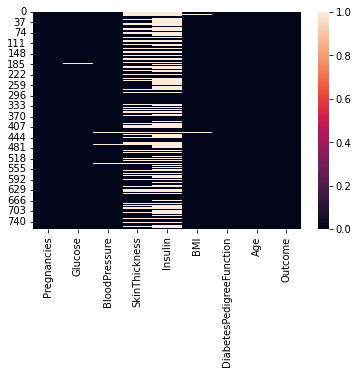

In [15]:
sns.heatmap(df2.isna())

### Deleting rows with missing values

As a first approach, try deleting rows where data is missing. How much data do you have left?
Check the new score. How do you interpret this result?

**Answer**

The number of rows almost halved. The accuracy of the prediction increased by 4%. It is probably because the zeros were bringing noise that mistook the predictive model. However, it is hard to be entirely satisfied with this operation as the number of observations almost halved, letting significantly less data remaining to train the model (cf. cell below).

In [16]:
df3=df2.dropna() # supress all rows containing at least one Nan

print(np.shape(df3))

diagnosis_knn(df3)

(392, 9)
Max train score 100.0 % for k = [1]
Max test score 80.0 % for k = [9, 11]


### Replacing missing values

In a lot of cases, replacing the missing data can provide better classification results than simply deleting the data. In the sections below, we will test different methods for data replacement.

For each of these methods :
- Perform the replacement on the data we cleaned up
- Check how the diagnosis score evolves
- Try providing an explanation for this evolution
- Scale the data and see if there are any changes

*Hint: Pandas has a `fillna()` function!*

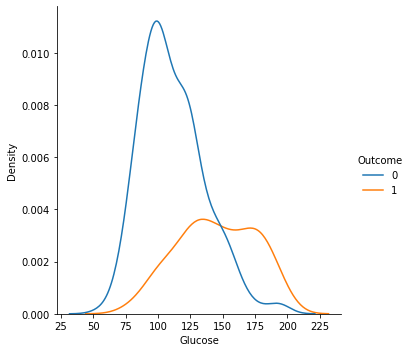

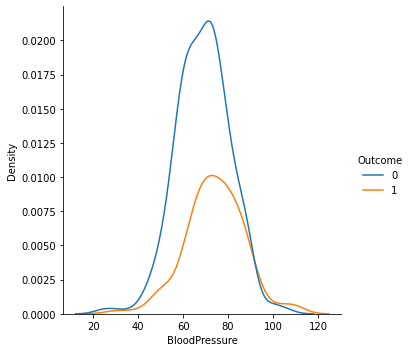

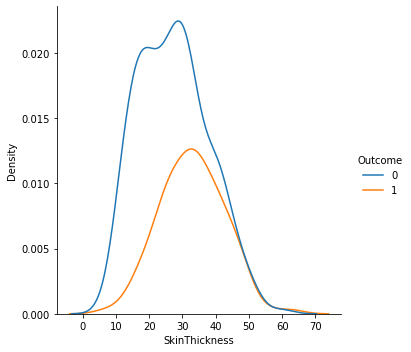

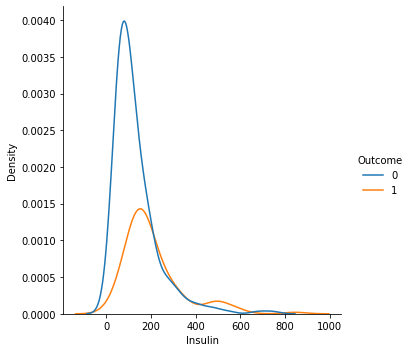

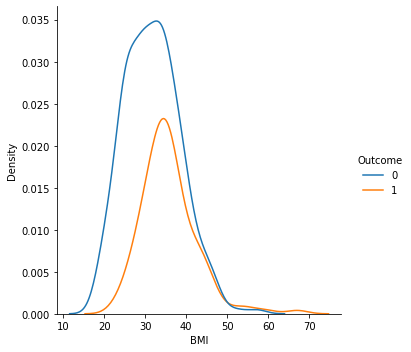

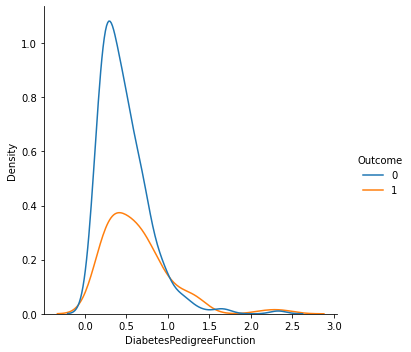

In [17]:
# Let's display the distributions of the non-missing values for each feature concerned by missing values

sns.displot(df3, x="Glucose", kind="kde", hue="Outcome")
sns.displot(df3, x="BloodPressure", kind="kde", hue="Outcome")
sns.displot(df3, x="SkinThickness", kind="kde", hue="Outcome")
sns.displot(df3, x="Insulin", kind="kde", hue="Outcome")
sns.displot(df3, x="BMI", kind="kde", hue="Outcome")
sns.displot(df3, x="DiabetesPedigreeFunction", kind="kde", hue="Outcome")

#### Replacing with mean values

In [18]:
from sklearn.impute import SimpleImputer

data = df2.to_numpy()
imputer_mean = SimpleImputer(missing_values = np.NaN, strategy = "mean")
df_filled_mean = pd.DataFrame(imputer_mean.fit_transform(data), columns = df2.columns)

diagnosis_knn(df_filled_mean)

Max train score 100.0 % for k = [1]
Max test score 74.02597402597402 % for k = [1]


In [19]:
outcome = df_filled_mean["Outcome"].to_numpy()                          
df_filled_mean_std = df_filled_mean.drop(["Outcome"], axis=1, inplace=False)        
df_filled_mean_std = scaler.fit_transform(df_filled_mean_std)                      
df_filled_mean_std = pd.DataFrame(df_filled_mean_std, columns=data_columns[:-1])    
df_filled_mean_std["Outcome"] = outcome                                 

diagnosis_knn(df_filled_mean_std)

Max train score 100.0 % for k = [1]
Max test score 81.81818181818183 % for k = [5]


**Comment**

The performance of the classifier does not vary much when replacing the missing value by the mean value for the feature.

#### Replacing with median values

In [20]:
imputer_med = SimpleImputer(missing_values = np.NaN, strategy = "median")
df_filled_med = pd.DataFrame(imputer_med.fit_transform(data), columns = df2.columns)

diagnosis_knn(df_filled_med)

Max train score 100.0 % for k = [1]
Max test score 75.32467532467533 % for k = [1]


In [21]:
outcome = df_filled_med["Outcome"].to_numpy()                          
df_filled_med_std = df_filled_med.drop(["Outcome"], axis=1, inplace=False)        
df_filled_med_std = scaler.fit_transform(df_filled_med_std)                      
df_filled_med_std = pd.DataFrame(df_filled_med_std, columns=data_columns[:-1])    
df_filled_med_std["Outcome"] = outcome                                 

diagnosis_knn(df_filled_med_std)

Max train score 100.0 % for k = [1]
Max test score 81.81818181818183 % for k = [5]


**Comment**

Same performance when remlacing missing values by median instead of mean values for the feature. As the distributions of feature values per class overlap a lot, median and mean value are close in spite of the dataset moderate imbalance. 

#### Replacing with random values

Here are some ways you can replace with random values:
- Replace with completely random values
- Replace with random values drawn uniformly between the minimum and maximum of each column
- Replace with random values drawn from a certain distribution for each column

*Hints*:
  - You can use functions such as [`numpy.random.uniform`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) to draw random samples. Numpy has functions for many distributions, such as uniform, normal or exponential.

*[Your comments here]*

#### Scikit learn imputation

For this step, you can try using `scikit-learn`'s `SimpleImputer`, `KNN-Imputer` and / or `IterativeImputer`. Make sure you refer to the documentation to parametrize the imputers!

In [22]:
from sklearn.impute import KNNImputer

imputer_knn = KNNImputer(missing_values = np.NaN)
df_filled_knn = pd.DataFrame(imputer_knn.fit_transform(data), columns = df2.columns)

diagnosis_knn(df_filled_knn)

Max train score 100.0 % for k = [1]
Max test score 74.02597402597402 % for k = [1]


In [23]:
outcome = df_filled_knn["Outcome"].to_numpy()                          
df_filled_knn_std = df_filled_knn.drop(["Outcome"], axis=1, inplace=False)        
df_filled_knn_std = scaler.fit_transform(df_filled_knn_std)                      
df_filled_knn_std = pd.DataFrame(df_filled_knn_std, columns=data_columns[:-1])    
df_filled_knn_std["Outcome"] = outcome                                 

diagnosis_knn(df_filled_knn_std)

Max train score 100.0 % for k = [1]
Max test score 79.22077922077922 % for k = [14]


**Comment**

Once again, the performance is steady despite replacing NaN values with the mean value for the feature of 5 observations with similar characteristics.

**Conclusion**

The standard scaler has been a great ally as it increased the prediction accuracy for all the different data preparation strategies we tried. By only scaling the data and without further manipulations, we reached 80% accuracy, a score that hasn't been significantly beaten by the other pre-processing strategies. 

However, the way this notebook is designed makes us scale the data before splitting the training and the testing sets, which is cheating. Indeed, standardizing the whole dataset uses information contained in the testing set to modify the training set which might boost the performance of the classifier.

Surprisingly, the different treatments of the zeros did not impact the performance much. In this dataset, there is a class imbalance in favor of the negative class and the mean values of the features per class tend to be lower for the negative class. This explains why the zeros did not have a catastrophic impact on the performance. A zero value might influence the prediction of the model towards negative, but the negative class is twice as big as the positive one, not degrading much the prediction accuracy.

Finally, it has been hard to increase the prediction accuracy above 80%. However, it is understandable by looking at the distributions for each feature. They overlap a lot, so this is hard to find truly discriminant features. Last thing, it would have been great to treat the data imbalance (cf. future work "Imbalanced_data_lab") before feeding it to the dataset splitter to avoid biasing the model.
